# 課題7 主成分分析
配点
- Q1 2P
- Q2 8P

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Q1 共分散行列

2つの変数$x$,$y$が取る対応する$n$個の値を

$x=(x_1,x_2,...,x_n)$, 

$y=(y_1,y_2,...,y_n)$

とすると、これらの変数間の共分散は以下のように計算できる。共分散は変数間の関係性を表すのに用いられ、共分散を正規化したものは相関係数となる。

$ \Sigma_{i=1}^{n} (x_i- \overline{x}) (y_i- \overline{y})/n$

$\overline{x}, \overline{y}$はそれぞれ$x$と$y$の平均。

不偏分散とする場合は$n-1$で割るが、本課題では標準分散を考え$n$で割ることを考える。

複数の変数について、変数間の分散（同一変数について）と共分散（異なる変数について）の一覧を行列の形でまとめたものを分散共分散行列と呼び（以下では単に共分散行列と呼ぶことにする）、2変数の場合は、共分散行列は以下のように表される。


$
   \left(
    \begin{array}{cc}
        \Sigma_{i=1}^{n}(x_i- \overline{x})^2/n  &  \Sigma_{i=1}^{n} (x_i- \overline{x}) (y_i- \overline{y})/n  \\
      \Sigma_{i=1}^{n} (x_i- \overline{x}) (y_i- \overline{y})/n　 &  \Sigma_{i=1}^{n}(y_i- \overline{y})^2/n 
    \end{array}
  \right)
$

行列（2次元配列）を引数として受け取り、***各列を変数として列間の***共分散行列を配列として返す関数`cov_matrix`を完成させてください。

In [29]:
def cov_matrix(X):
    ### 引数：
    # X: 行列（2次元配列）
    m = X.shape[0]
    n = X.shape[1]
    cov = np.zeros((n,n))

    ### 入力の行列の列間の共分散行列を計算するコード
    Xbar = np.mean(X, axis=0)
    cov = np.dot((X - Xbar).T, X - Xbar) / m

    return cov

`cov_matrix`関数が完成したら、以下のセルを実行して動作を確認してください。irisデータセットの4つの特徴量間の共分散行列を求めています。この共分散行列の要素の和は約9.6となります。

In [30]:
from sklearn.datasets import load_iris
iris = load_iris() 
X = iris['data']
print(cov_matrix(X))
print(np.sum(cov_matrix(X)))

[[ 0.68112222 -0.04215111  1.26582     0.51282889]
 [-0.04215111  0.18871289 -0.32745867 -0.12082844]
 [ 1.26582    -0.32745867  3.09550267  1.286972  ]
 [ 0.51282889 -0.12082844  1.286972    0.57713289]]
9.692835999999998


NumPyのcov関数で上記の共分散行列は求めると以下のようになります。

In [6]:
np.cov(X, rowvar=0, ddof=0)

array([[ 0.68112222, -0.04215111,  1.26582   ,  0.51282889],
       [-0.04215111,  0.18871289, -0.32745867, -0.12082844],
       [ 1.26582   , -0.32745867,  3.09550267,  1.286972  ],
       [ 0.51282889, -0.12082844,  1.286972  ,  0.57713289]])

## Q2 主成分分析
以下では、主成分分析により特徴量の次元縮約を行う`pca`関数を実装します。`pca`関数では第1引数に入力のデータ行列（データ数($m$)$\times$次元数($n$))、第2引数に次元数$k$を受け取り、入力データを第2引数で指定された次元数に縮約した行列（データ数($m$)$\times$次元数($k$))とその時の累積寄与率を返します。

具体的に、`pca`関数では以下の手順により入力データの次元縮約を行います。

- 各次元（特徴量）の標準化

    - 入力データの各次元（特徴量）をそれぞれ平均0, 分散1に標準化する

- 特徴量間の共分散行列の作成

    - 標準化した特徴量間の共分散行列（$n \times n$)を作成する

- 共分散行列の固有値・固有ベクトルの計算

    - 固有値・固有ベクトルの計算には`NumPy`の`np.linalg.eig`関数を用いる。`np.linalg.eig`関数の引数に以下のように行列を与えると、その行列の固有値を要素とする配列`w`とそれらの固有値に対応する固有ベクトルを列に持つ行列`v`（2次元配列）を返します。
```Python
w, v = np.linalg.eig(行列)
```
- 元のデータを$k$個の固有ベクトル（主成分）を基底とする座標で表す

    - 上記で計算した固有値・固有ベクトルについて、固有ベクトルをそれが対応する固有値の大きい順に$k$個選び、それらをデータの新たな基底とします。

        - 例えば、$n=4, k=2$ とし、4次元のデータを2次元に縮約するときは、固有値の大きい順に固有ベクトル$v_1, v_2$を２つ選び、元のデータ$x^{(i)}$との内積を計算することで、元のデータに対して$v_1, v_2$を新たな基底とする縮約された次元の座標$x^{(i)}_{new}$を計算できる。

        - $x^{(i)}_{new}=(x^{(i)}v_1, x^{(i)}v_2)$（$v_1, v_2$を基底とする座標）

    - 上記で標準化した元の入力データ行列を$X$（$x^{(1)},x^{(2)},...,x^{(m)}$を行ベクトルとする行列）とし、$k$個の固有ベクトル$v_1,v_2,...,v_k$を列ベクトルとする行列$(v_1 v_2 ... v_k)$を考えると、`pca`関数が返す$k$次元に縮約されたデータは$v_1,v_2,...,v_k$を基底した座標点として以下のように表せる。

$
    \left(
    \begin{array}{c}
      x^{(1)}_{new}  \\
       x^{(2)}_{new}  \\
        ...  \\
         x^{(m)}_{new}  \\
    \end{array}
  \right)
  =
  \left(
    \begin{array}{c}
      x^{(1)}  \\
       x^{(2)}  \\
        ...  \\
         x^{(m)}  \\
    \end{array}
  \right)
    \left(
    \begin{array}{cccc}
      v_1 & v_2 & ... & v_k 
    \end{array}
  \right)
  =
  \left(
    \begin{array}{c}
      x^{(1)} v_1,  x^{(1)} v_2, ..., x^{(1)} v_k \\
       x^{(2)} v_1,  x^{(2)} v_2, ..., x^{(2)} v_k \\
    ...  \\
     x^{(m)} v_1,  x^{(m)} v_2, ..., x^{(m)} v_k \\ 
    \end{array}
  \right)
$

- 累積寄与率の計算
    - $k$個の固有ベクトル（主成分）までの固有値$\lambda_i(i=1,..,k)$（分散）の和が全部の固有値（分散）$\lambda_i(i=1,..,n)$の総和に占める以下の割合を累積寄与率と呼ぶ。`pca`関数は$k$次元に縮約されたデータとともにこの累積寄与率を返す

    - $\Sigma_{i=1}^k\lambda_i/\Sigma_{i=1}^n\lambda_i$

上記に従って、`pca`関数を完成させてください。

In [54]:
def pca(X, k):
    ### 引数：
    # X: 入力のデータ行列(データ数m*次元数n)
    # k: 次元数

    ### 1. 入力データの各列を標準化するコード（分散は標準分散としてよい）
    X_standardized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

    ### 2. 1.で標準化した入力データの列間の共分散行列を作成するコード（分散、共分散は標準分散としてよい）
    cov = cov_matrix(X_standardized)

    ### 3. 共分散行列の固有値・固有ベクトルを計算するコード
    w, v = np.linalg.eig(cov)
    ind = np.argsort(w)[::-1]
    
    ### 4. 標準化した入力データをk個の固有ベクトルを基底とした座標で表した行列を求めるコード
    X_new = np.dot(X, v[:, ind[:k]])

    ### 5. 累積寄与率を計算するコード
    contribution_rate = np.sum(w[ind[:k]]) / np.sum(w)

    return X_new, contribution_rate

`pca`関数が完成したら、以下のセルをそれぞれ実行して動作を確認してください。それぞれ、irisデータセットの4つの特徴量からなる特徴空間を1次元、2次元、3次元に次元縮約した結果を可視化しています。データは花の種類ごとに色分けしており、縮約された特徴空間において花の種類ごとにデータが近接していることがわかります。

1次元に縮約した時の累積寄与率は約0.72ですが、2次元に縮約した時の累積寄与率は約0.95となり、データ全体の分散に対して第1と第2の主成分（固有ベクトル）の分散（固有値）が多く占めていることがわかります。

0.7296244541329993


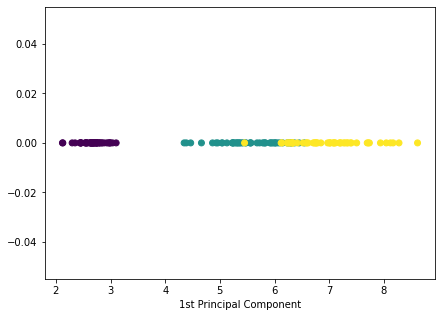

In [55]:
D, P=pca(X, 1) # 1次元に縮約
print(P) # 累積寄与率

plt.figure(figsize=(7,5))
plt.xlabel("1st Principal Component")
plt.scatter(D[:,0], np.zeros(D.shape[0]),c=iris.target);

0.9581320720000165


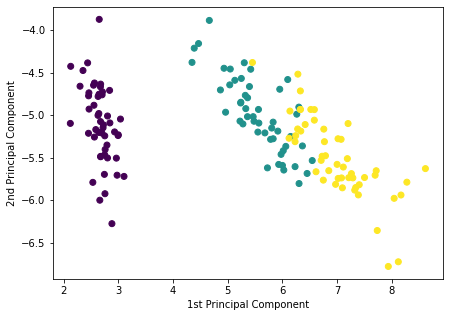

In [56]:
D, P=pca(X, 2) # 2次元に縮約
print(P) # 累積寄与率

plt.figure(figsize=(7,5))
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.scatter(D[:,0], D[:,1],c=iris.target);

0.9948212908928451


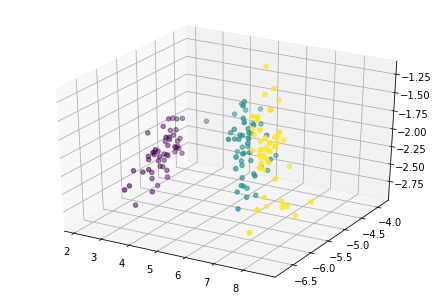

In [57]:
from mpl_toolkits.mplot3d import Axes3D

D, P=pca(X, 3) # 3次元に縮約
print(P) # 累積寄与率

ax = Axes3D(plt.figure())
ax.scatter(D[:,0], D[:,1], D[:,2],c=iris.target);

## 参考：scikit-learnでの主成分分析

0.9581320720000165


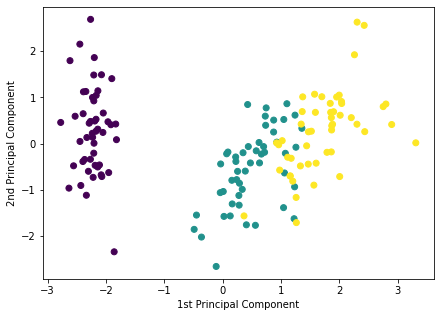

In [58]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris() 

# 標準化
scaler = StandardScaler()
X = scaler.fit_transform(iris['data'])

model = PCA(n_components=2) # 2次元に縮約
model.fit(X) 
D=model.transform(X) 
print(np.sum(model.explained_variance_ratio_)) # 累積寄与率

plt.figure(figsize=(7,5))
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")
plt.scatter(D[:,0], D[:,1],c=iris.target);

0.9948212908928452


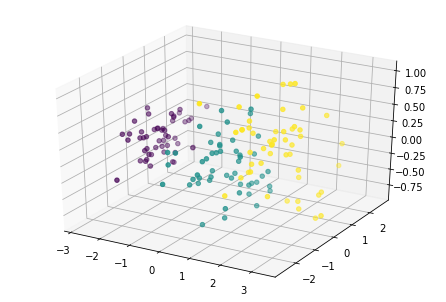

In [59]:
from mpl_toolkits.mplot3d import Axes3D

model = PCA(n_components=3) # 3次元に縮約
model.fit(X) 
D=model.transform(X) 
print(np.sum(model.explained_variance_ratio_)) # 累積寄与率

ax = Axes3D(plt.figure())
ax.scatter(D[:,0], D[:,1], D[:,2],c=iris.target);

## コードのテスト
以下の実行ボタンを押してから、設問ごとにCheck関数でコードのテストをしてください。

In [60]:
## コードのテストの前にこのセルを実行してください
!pip install prog_edu_assistant_tools
import re
import sys
import jinja2
from IPython.core import display
from google.colab import _message as google_message
from prog_edu_assistant_tools.magics import report, autotest, CaptureOutput
from prog_edu_assistant_tools.check import Check

## Q1

In [61]:
# Run this cell to check your solution.
# If you get an error 'Check not defined', make sure you have run all preceding
# cells once (Runtime -> Run before)
Check('q1')

## Q2

In [62]:
# Run this cell to check your solution.
# If you get an error 'Check not defined', make sure you have run all preceding
# cells once (Runtime -> Run before)
Check('q2')